# Task 1. Paper review
### By Oleh Onyshchak

## Paper

* **Title**: Precise Detection in Densely Packed Scenes
* **Authors**: Eran Goldman, Roei Herzig, Aviv Eisenschtat, Jacob Goldberger, Tal Hassner
* **Link**: 
http://openaccess.thecvf.com/content_CVPR_2019/papers/Goldman_Precise_Detection_in_Densely_Packed_Scenes_CVPR_2019_paper.pdf
* **Year**: 2019

## Summary

### What

Paper describes enhancments to state of the art object detection techniques such as [RetinaNet][1] for domain of densely packed scenes such as retail shelf displays, traffic, and urban landscape images.

![comparation](https://raw.githubusercontent.com/eg4000/SKU110K_CVPR19/master/figures/teaser_width.jpg)
_A typical image in our SKU-110K, showing densely packed objects. (a) Detection results for the state-of-the-art RetinaNet, showing incorrect and overlapping detections, especially for the dark objects at the bottom which are harder to separate. (b) Our results showing far fewer misdetections and better fitting bounding boxes. (c) Zoomed-in views for RetinaNet and (d) our method._


The idea here is to supplement the existing state of the art approach of object detection, implemeted with ResNet50 network, with additional property, which will allow later on properly resolve conflicts of multiple overlapping bounding boxes in a highly dense scene. This added property, called soft Intersection over Union (Soft-IoU), allows us to treat bounding box position in a probabilistic way (the probability that it matches the ground truth bounding box). Later on, we could represent this probability and location properties of each bounding box as a Mixture of Gaussians(MoG). And then we could use the well-known Expectation-Maximization(EM) method to cluster those Gaussisans into groups, resolving detection overlap conflicts. With this approach, we could resolve a problem with multiple overlapping bounding boxes(BB) in previous methods and output 1 BB per object



### How

in this article we will cover details of approaches introduces in this paper. If you aren't familiar with ResNet50 architecture and concepts, please refer to [this][2] paper. So let's describe processing of founded bounding boxes(BB) and objectness score C from ResNet50 output:
* Soft-IoU layer: if we have N founded BB and C, then 
$$ IoU_i = \frac{Intersection(BB_i^T, BB_i)}{Union(BB_i^T, BB_i)}, $$
where BB_i^T - is true bounding box, which is calculated as the closest BB to our predicted one (we have a marked dataset to train on). Set operations here are pixel-wise.
Then we also will incorporate our set of IoU coeficients into network's loss function using a binary cross-entropy loss.
* EM-Merger layer: We can represent our detected BB as a set of 2D Gaussians:
$$ F = {F_i}_{i=1}^N = {\mathcal{N}(p; \mu_i, \sigma_i)}_{i=1}^N, $$
where $\mu_i$ is a central point of BB, and $\sigma_i$ is a diagonal covariance of the box equals $[(hi/4)^2, 0; 0, (wi/4)^2]$, reflecting box size $(h_i, w_i)$
Then we can separate overlapped Gaussians distribution using EM method.

![how](https://raw.githubusercontent.com/eg4000/SKU110K_CVPR19/master/figures/system.jpg)
_System diagram: (a) Input image. (b) A base network, with bounding box (BB) and objectness (Obj.) heads, along with our novel Soft-IoU layer. (c) Our EM-Merger converts Soft-IoU to Gaussian heat-map representing (d) objects captured by multiple, overlapping bounding boxes. (e) It then analyzes these box clusters, producing a single detection per object_


### Results

There is no doubt about the usefulness of this functionality. Since we have a lot of cases where similar objects are densely located on the photo such as goods on shelves, cars in traffic jams etc. And those fields are highly commercial, thus any innovations here are valuable. And below you could compare the results of the current state of the art approach and its enhancements suggested in the paper. Where the latter has far better results.
![comparation2](https://raw.githubusercontent.com/eg4000/SKU110K_CVPR19/master/figures/qualitative.jpg)


[1]: http://openaccess.thecvf.com/content_ICCV_2017/papers/Lin_Focal_Loss_for_ICCV_2017_paper.pdf
[2]: https://arxiv.org/pdf/1512.03385.pdf

# Task 2. CNN visualisation

Below you can see visualisation of ResNet34, on which the paper is based. Details about arhitercture and their explanation could be found here:
https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8

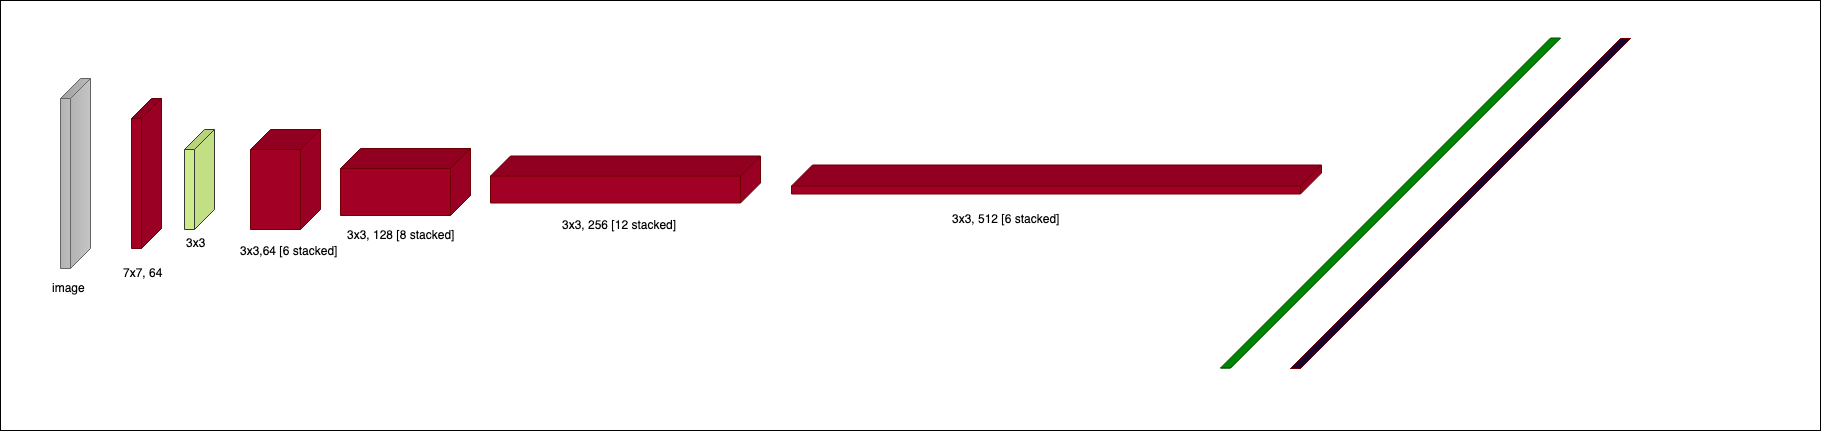